## Report for JCPenney

## Appendix

## Loading the Dataset



In [2]:
import pandas as pd  #Importing necessary libraries
import numpy as np
import json

def load_json_lines(filepath):
    data = [] #creates an empty list to store the JSON objects
    with open(filepath, "r") as f:  #Opens the file for reading
        for line in f:
            try:
                data.append(json.loads(line))   #Adds each JSON object to the list
            except json.JSONDecodeError:
                continue                #Will skip any lines not valid
    return pd.json_normalize(data)   #Converts the list into a Pandas dataframe

#Loading all the files
products = pd.read_csv("products[1].csv")
reviews = pd.read_csv("reviews[1].csv")
users = pd.read_csv("users[1].csv")
jc_products = load_json_lines("jcpenney_products[1].json")
jc_reviewers = load_json_lines("jcpenney_reviewers[1].json")

I have loaded the 5 files into the notebook but to keep it clean, I want to review and clean each file one at a time.

# Data Cleaning


In [3]:
products.head(2), products.info()  #To see an overview of the dataframe, column names/data types/non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB


(                            Uniq_id           SKU  \
 0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
 1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
 
                                           Name  \
 0  Alfred Dunner® Essential Pull On Capri Pant   
 1  Alfred Dunner® Essential Pull On Capri Pant   
 
                                          Description  Price  Av_Score  
 0  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625  
 1  Youll return to our Alfred Dunner pull-on capr...  41.09     3.000  ,
 None)

I first notice different non-null counts and 6 columns with each beginning with a capital letter. I can't assume the other files are in the same format so first I want to clean the column names which I intend to do with every file to keep consistancy.


In [4]:
products.columns = (    #Begin to clean the column names
    products.columns
    .str.lower()       #Put it all into lower case
    .str.strip()       #Remove spaces
    .str.replace(" ", "_")  #To use underscores instead
)

print(products.columns)

Index(['uniq_id', 'sku', 'name', 'description', 'price', 'av_score'], dtype='object')


In [5]:
products.isna().sum() #To see if there is any missing values

uniq_id           0
sku              67
name              0
description     543
price          2166
av_score          0
dtype: int64

Id/name/score all have 7982 non-null count, so I aim to make description/price/sku the same

In [6]:
products["description"] = products["description"].fillna("No description available")
#Replacing empty values in description column with "No description available"
products["price"] = products["price"].fillna(products["price"].median())
#Fills any missing prices with a median price to help balance the dataset instead of completely removing those rows


In [7]:
products["sku"] = products["sku"].fillna("unknown") # Replace missing SKU values with "unknown" to keep the row but mark it clearly.
products.isna().sum() 

uniq_id        0
sku            0
name           0
description    0
price          0
av_score       0
dtype: int64

In [8]:
products.head(2), products.info() #Review the dataset again to see if the changes have been made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uniq_id      7982 non-null   object 
 1   sku          7982 non-null   object 
 2   name         7982 non-null   object 
 3   description  7982 non-null   object 
 4   price        7982 non-null   float64
 5   av_score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB


(                            uniq_id           sku  \
 0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
 1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
 
                                           name  \
 0  Alfred Dunner® Essential Pull On Capri Pant   
 1  Alfred Dunner® Essential Pull On Capri Pant   
 
                                          description  price  av_score  
 0  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625  
 1  Youll return to our Alfred Dunner pull-on capr...  41.09     3.000  ,
 None)

Products file is now clean, on to the reviews.csv.

In [9]:
reviews.head(2), reviews.info() #Now looking at the reviews file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


(                            Uniq_id  Username  Score  \
 0  b6c0b6bea69c722939585baeac73c13d  fsdv4141      2   
 1  b6c0b6bea69c722939585baeac73c13d  krpz1113      1   
 
                                               Review  
 0  You never have to worry about the fit...Alfred...  
 1  Good quality fabric. Perfect fit. Washed very ...  ,
 None)

To keep column names consistant with every data set, I will be making them all lower case, removing spaces and adding "_" instead. 
I also want to make sure there is a unique number of IDs in both files to make sure they match

In [10]:
reviews.columns = (  
    reviews.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

In [11]:
products["uniq_id"].nunique(), reviews["uniq_id"].nunique() #checking for number of unique entries in the uniq_id columns

(7982, 7982)

In [12]:
reviews.duplicated().sum() #checking for duplicated values in each column

np.int64(0)

In [13]:
reviews.head(2), reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uniq_id   39063 non-null  object
 1   username  39063 non-null  object
 2   score     39063 non-null  int64 
 3   review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


(                            uniq_id  username  score  \
 0  b6c0b6bea69c722939585baeac73c13d  fsdv4141      2   
 1  b6c0b6bea69c722939585baeac73c13d  krpz1113      1   
 
                                               review  
 0  You never have to worry about the fit...Alfred...  
 1  Good quality fabric. Perfect fit. Washed very ...  ,
 None)

The reviews file looks clean so on to the users.

In [15]:
users.head(2), users.info()  #Looking at users file summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


(   Username         DOB          State
 0  bkpn1412  31.07.1983         Oregon
 1  gqjs4414  27.07.1998  Massachusetts,
 None)

In [16]:
users.columns = (  #Keeping consistancy in column names
    users.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

In [17]:
users["dob"] = pd.to_datetime(users["dob"], format="%d.%m.%Y", errors="coerce")  
#Converts the date of birth from strings to datetime objects for easier analysis
users["dob"].head()

0   1983-07-31
1   1998-07-27
2   1950-08-08
3   1969-08-03
4   2001-07-26
Name: dob, dtype: datetime64[ns]

I want to make sure there is no repeated State name, with perhaps one starting with a capital letter and the other not.

In [18]:
users["state"].unique(), users["state"].nunique()  #Making sure there is no duplicate states and to get how many unique states there are 

(array(['Oregon', 'Massachusetts', 'Idaho', 'Florida', 'Georgia',
        'Montana', 'Pennsylvania', 'Connecticut', 'Arkansas', 'Nebraska',
        'California', 'New Hampshire', 'District of Columbia',
        'Washington', 'Minnesota', 'New Mexico', 'Virginia', 'Kansas',
        'Illinois', 'North Dakota', 'Colorado', 'New York',
        'Minor Outlying Islands', 'Northern Mariana Islands',
        'West Virginia', 'Texas', 'South Dakota', 'Maryland', 'Maine',
        'Ohio', 'Rhode Island', 'Michigan', 'Alaska', 'Iowa', 'Oklahoma',
        'Mississippi', 'South Carolina', 'Missouri', 'New Jersey',
        'Tennessee', 'North Carolina', 'Guam', 'Wyoming', 'Delaware',
        'Vermont', 'Indiana', 'Louisiana', 'Wisconsin', 'Hawaii',
        'Puerto Rico', 'Alabama', 'Kentucky', 'Arizona', 'Nevada', 'Utah',
        'American Samoa', 'U.S. Virgin Islands'], dtype=object),
 57)

In [19]:
users.head(2), users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  5000 non-null   object        
 1   dob       5000 non-null   datetime64[ns]
 2   state     5000 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 117.3+ KB


(   username        dob          state
 0  bkpn1412 1983-07-31         Oregon
 1  gqjs4414 1998-07-27  Massachusetts,
 None)

In [20]:
users["username"].nunique(), reviews["username"].nunique()

(4999, 4993)

I notice there are a different number of unique usernames in the users/reviews files. I believe this just mean 6 usernames just didn't leave any reviews on products so I shouldn't need to alter this.

Users.csv looks clean and column names match, on to the next.

In [21]:
jc_products.head(2), jc_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id                 7982 non-null   object 
 1   sku                     7982 non-null   object 
 2   name_title              7982 non-null   object 
 3   description             7982 non-null   object 
 4   list_price              7982 non-null   object 
 5   sale_price              7982 non-null   object 
 6   category                7982 non-null   object 
 7   category_tree           7982 non-null   object 
 8   average_product_rating  7982 non-null   float64
 9   product_url             7982 non-null   object 
 10  product_image_urls      7982 non-null   object 
 11  brand                   7982 non-null   object 
 12  total_number_reviews    7982 non-null   int64  
 13  Reviews                 7982 non-null   object 
 14  Bought With             7982 non-null   

(                            uniq_id           sku  \
 0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
 1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
 
                                     name_title  \
 0  Alfred Dunner® Essential Pull On Capri Pant   
 1  Alfred Dunner® Essential Pull On Capri Pant   
 
                                          description list_price sale_price  \
 0  You'll return to our Alfred Dunner pull-on cap...      41.09      24.16   
 1  You'll return to our Alfred Dunner pull-on cap...      41.09      24.16   
 
         category                 category_tree  average_product_rating  \
 0  alfred dunner  jcpenney|women|alfred dunner                   2.625   
 1  alfred dunner  jcpenney|women|alfred dunner                   3.000   
 
                                          product_url  \
 0  http://www.jcpenney.com/alfred-dunner-essentia...   
 1  http://www.jcpenney.com/alfred-dunner-essentia...   
 
                                   product

In [22]:
jc_products.columns = (  #Noticed some capital letters again in column names so doing this for consistancy with names
    jc_products.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

I noticed several columns in the jc_products dataset had identical values but were named differently so here I am changing their names to match the other data sets for an easier merge

In [23]:
jc_products = jc_products.rename(columns={  #Renaming column names
    "name_title": "name",
    "list_price": "price",
    "average_product_rating": "av_score",
    "reviews": "review"
})   



In [24]:
jc_products.isna().sum() #Noticed all non-null counts correct but double checking for missing values

uniq_id                 0
sku                     0
name                    0
description             0
price                   0
sale_price              0
category                0
category_tree           0
av_score                0
product_url             0
product_image_urls      0
brand                   0
total_number_reviews    0
review                  0
bought_with             0
dtype: int64

In [25]:
jc_products["review"].head()

0    [{'User': 'fsdv4141', 'Review': 'You never hav...
1    [{'User': 'tpcu2211', 'Review': 'You never hav...
2    [{'User': 'pcfg3234', 'Review': 'You never hav...
3    [{'User': 'ngrq4411', 'Review': 'You never hav...
4    [{'User': 'nbmi2334', 'Review': 'You never hav...
Name: review, dtype: object

I noticed in jc_products that the review column also maintains the User name and it appears, also repeated reviews.


In [26]:
jc_products = jc_products.explode("review")  #Putting the list of reviews into separate rows

review_details = jc_products["review"].apply(pd.Series) #converting the dictionaries to separate columns

jc_products = pd.concat([jc_products.drop(columns=["review"]), review_details], axis=1)  #Removing old review column and replacing with the new ones

jc_products.head(2), jc_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39063 entries, 0 to 7981
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uniq_id               39063 non-null  object 
 1   sku                   39063 non-null  object 
 2   name                  39063 non-null  object 
 3   description           39063 non-null  object 
 4   price                 39063 non-null  object 
 5   sale_price            39063 non-null  object 
 6   category              39063 non-null  object 
 7   category_tree         39063 non-null  object 
 8   av_score              39063 non-null  float64
 9   product_url           39063 non-null  object 
 10  product_image_urls    39063 non-null  object 
 11  brand                 39063 non-null  object 
 12  total_number_reviews  39063 non-null  int64  
 13  bought_with           39063 non-null  object 
 14  User                  39063 non-null  object 
 15  Review                390

(                            uniq_id           sku  \
 0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
 0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
 
                                           name  \
 0  Alfred Dunner® Essential Pull On Capri Pant   
 0  Alfred Dunner® Essential Pull On Capri Pant   
 
                                          description  price sale_price  \
 0  You'll return to our Alfred Dunner pull-on cap...  41.09      24.16   
 0  You'll return to our Alfred Dunner pull-on cap...  41.09      24.16   
 
         category                 category_tree  av_score  \
 0  alfred dunner  jcpenney|women|alfred dunner     2.625   
 0  alfred dunner  jcpenney|women|alfred dunner     2.625   
 
                                          product_url  \
 0  http://www.jcpenney.com/alfred-dunner-essentia...   
 0  http://www.jcpenney.com/alfred-dunner-essentia...   
 
                                   product_image_urls          brand  \
 0  http://s7d9.scene7.c

I now notice the review column actually maintained the username, review and score, so I want to make sure these new column names are all consistant with the others.

In [27]:
jc_products.columns = (   #putting all in lower case for consistancy
    jc_products.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

jc_products.head(2)

,uniq_id,sku,name,description,price,sale_price,category,category_tree,av_score,product_url,product_image_urls,brand,total_number_reviews,bought_with,user,review,score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",krpz1113,Good quality fabric. Perfect fit. Washed very ...,4


I want to make sure there are no duplicates but received an error at first indicating a column contains lists which I did not notice at first but upon looking back on it, I see the "bought_with" column contains lists so I am going to create a new dataset temporarily without that column to check for duplicates.


In [28]:
jc_products_no_lists = jc_products.drop(columns=["bought_with"])

jc_products_no_lists.duplicated().sum()


np.int64(0)

There are no duplicates so on to JC reviewers.


In [29]:
jc_reviewers.head(2),jc_reviewers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
 3   Reviewed  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


(   Username         DOB          State                            Reviewed
 0  bkpn1412  31.07.1983         Oregon  [cea76118f6a9110a893de2b7654319c0]
 1  gqjs4414  27.07.1998  Massachusetts  [fa04fe6c0dd5189f54fe600838da43d3],
 None)

In [30]:
jc_reviewers.columns = ( 
    jc_reviewers.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

In [31]:
jc_reviewers["dob"] = pd.to_datetime(jc_reviewers["dob"], format="%d.%m.%Y", errors="coerce")  #Converting to datetime objects again 

jc_reviewers.head(2)

,username,dob,state,reviewed
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]


In [32]:
jc_reviewers.isna().sum() #Checking for missing values

username    0
dob         0
state       0
reviewed    0
dtype: int64

In [33]:
jc_reviewers["state"].nunique()  #Making sure the states match up with the reviews file

57

I want to merge the datasets now and if i spot anything wrong, I could then restart or hopefully alter the merged dataset. As column names are repeated, I want to make it easier to remove the duplicated columns so I added the suffixes to each one so it is easier to identify which columns to remove.

In [34]:
final_merged = (   
    reviews
    .merge(products, on="uniq_id", how="left", suffixes=("", "_prod"))  #
    .merge(jc_products, on="uniq_id", how="left", suffixes=("", "_json"))
    .merge(users, on="username", how="left", suffixes=("", "_user"))
    .merge(jc_reviewers, on="username", how="left", suffixes=("", "_jsonrev"))
)
#Merging the 4 datasets - if a column name is the same, instead of overwriting each other, 
#the column will get a suffix added at the end for easier removal afterwards
final_merged.shape, final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279203 entries, 0 to 279202
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uniq_id               279203 non-null  object        
 1   username              279203 non-null  object        
 2   score                 279203 non-null  int64         
 3   review                279203 non-null  object        
 4   sku                   279203 non-null  object        
 5   name                  279203 non-null  object        
 6   description           279203 non-null  object        
 7   price                 279203 non-null  float64       
 8   av_score              279203 non-null  float64       
 9   sku_json              279203 non-null  object        
 10  name_json             279203 non-null  object        
 11  description_json      279203 non-null  object        
 12  price_json            279203 non-null  object        
 13 

((279203, 30), None)

In [35]:
final_merged = final_merged.drop(columns=[
    "sku_json",          #Removing all the columns that were duplicates when merged
    "name_json",
    "description_json",
    "price_json",
    "av_score_json",
    "review_json",
    "score_json",
    "dob_jsonrev",
    "state_jsonrev"
]) 

final_merged.shape, final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279203 entries, 0 to 279202
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uniq_id               279203 non-null  object        
 1   username              279203 non-null  object        
 2   score                 279203 non-null  int64         
 3   review                279203 non-null  object        
 4   sku                   279203 non-null  object        
 5   name                  279203 non-null  object        
 6   description           279203 non-null  object        
 7   price                 279203 non-null  float64       
 8   av_score              279203 non-null  float64       
 9   sale_price            279203 non-null  object        
 10  category              279203 non-null  object        
 11  category_tree         279203 non-null  object        
 12  product_url           279203 non-null  object        
 13 

((279203, 21), None)

In [36]:
final_merged.head(2)

,uniq_id,username,score,review,sku,name,description,price,av_score,sale_price,...,category_tree,product_url,product_image_urls,brand,total_number_reviews,bought_with,user,dob,state,reviewed
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625,24.16,...,jcpenney|women|alfred dunner,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,1980-07-31,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c..."
1,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625,24.16,...,jcpenney|women|alfred dunner,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",krpz1113,1980-07-31,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c..."


In [37]:
final_merged.duplicated(subset=["uniq_id", "username", "score", "review", "sku", "name", "description", "price", "av_score", "sale_price"]).sum()

np.int64(240140)

I notice the non-null count is much higher than before. So i want to check for duplicates. Seeing the first 5 entries I notice they are all repeated. I also notice the username/user do not match up but the username is being repeated(as it should be expected with all the the other columns being repeated). I am deciding to drop the user column as it shouldn't be needed alongside the username column which seems to reflect the information accurately, then I will drop the duplicated columns.

In [38]:
final_merged = final_merged.drop(columns=["user"])   #removing the user column


In [40]:
final_merged = final_merged.drop_duplicates(
    subset=["uniq_id", "username", "score", "review", "sku", "name", "description", "price", "av_score", "sale_price"],
  )   #Removes all duplicated rows but keeps the first

final_merged.head(2)

,uniq_id,username,score,review,sku,name,description,price,av_score,sale_price,category,category_tree,product_url,product_image_urls,brand,total_number_reviews,bought_with,dob,state,reviewed
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625,24.16,alfred dunner,jcpenney|women|alfred dunner,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",1980-07-31,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c..."
8,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625,24.16,alfred dunner,jcpenney|women|alfred dunner,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",1987-07-30,Virginia,"[9ce30016f492e7cc09e4554d4c67230d, b28e5508c1b..."


No more duplicates and the dataset looks good so I want to test some analysis/plots and with that information, hopefully it will raise more questions that I could then go on to answer.

# Analysis/Insights/Visualisation

In [41]:
#loading libraries needed for plotting/analysis
import matplotlib.pyplot as plt
import seaborn as sns

First I wanted to see some plots such as what the top 20 categories were, which states reviewed the most(as that could indicate which states buy the most), what the relationship between price/rating is(does rating get higher when price does?), which products were the highest rated? Does the number of reviews a product receives correlate with their rating, so do people only send in reviews for bad products? 

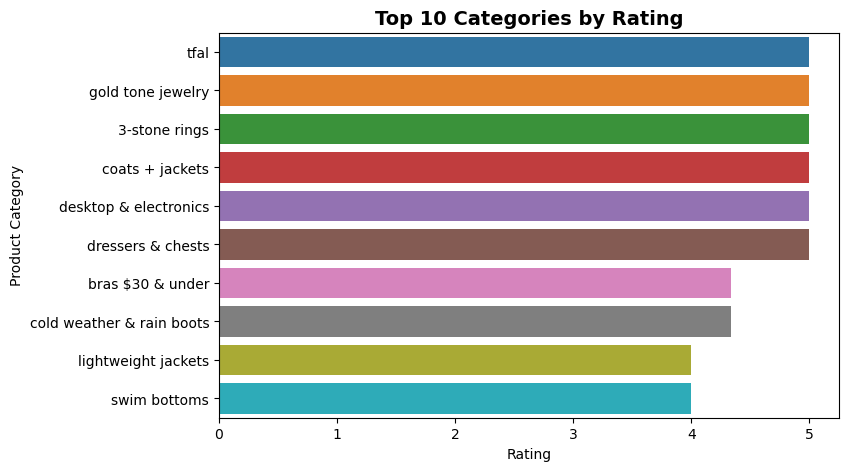

In [42]:
top20_categories = (                                #Creating a dataset for the top 20 ratings by category
    final_merged.groupby("category")["score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=top20_categories, x="score", y="category", hue = "category")   #Plotting a barplot 
plt.title("Top 10 Categories by Rating", fontsize=14, weight="bold")
plt.xlabel("Rating")
plt.ylabel("Product Category")
plt.show()

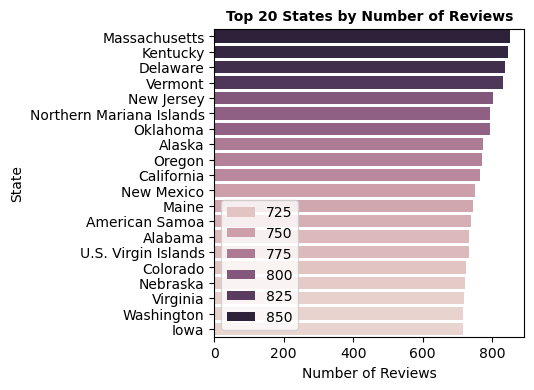

In [51]:
reviews_by_state = (
    final_merged.groupby("state")["total_number_reviews"].count()   #Dataset to show how many reviews each state gave - only top 20
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

plt.figure(figsize=(4, 4))
sns.barplot(data=reviews_by_state, x="total_number_reviews", y="state", hue = "total_number_reviews")
plt.title("Top 20 States by Number of Reviews", fontsize=10, weight="bold")
plt.xlabel("Number of Reviews")
plt.ylabel("State")
plt.legend(loc="lower left")

plt.show()

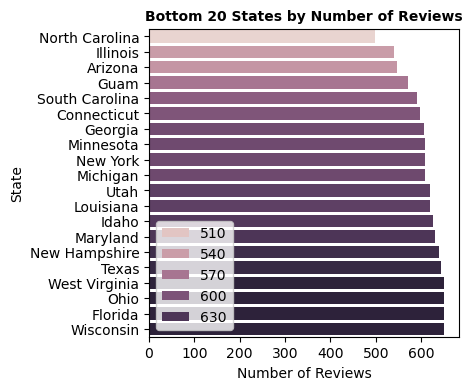

In [52]:
reviews_by_statetwo = (
    final_merged.groupby("state")["total_number_reviews"].count()  #Dataset to show how many reviews each state gave - only bottom 20
    .sort_values(ascending=True)
    .head(20)
    .reset_index()
)

plt.figure(figsize=(4, 4))
sns.barplot(data=reviews_by_statetwo, x="total_number_reviews", y="state", hue = "total_number_reviews")
plt.title("Bottom 20 States by Number of Reviews", fontsize=10, weight="bold")
plt.xlabel("Number of Reviews")
plt.ylabel("State")
plt.legend(loc="lower left")
plt.show()

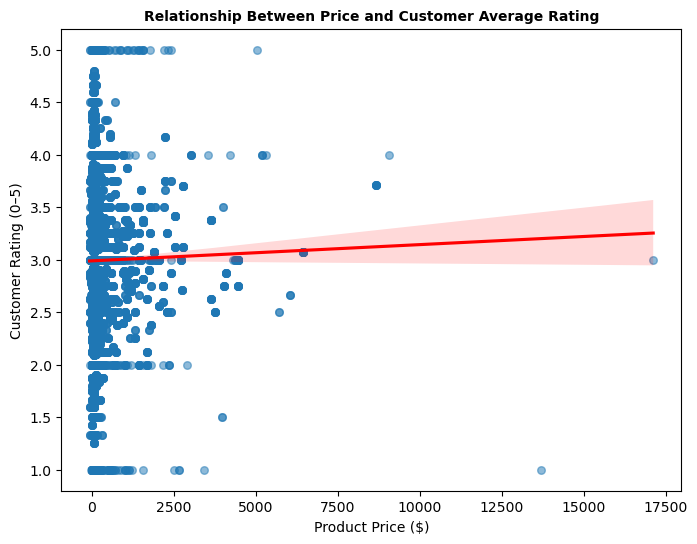

In [53]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=final_merged,
    x="price",
    y="av_score",
    scatter_kws={"alpha": 0.5, "s": 30},
    line_kws={"color": "red"}        #Line to show any correlation between price and average rating
)

plt.title("Relationship Between Price and Customer Average Rating", fontsize=10, weight="bold")
plt.xlabel("Product Price ($)")
plt.ylabel("Customer Rating (0–5)")
plt.show()

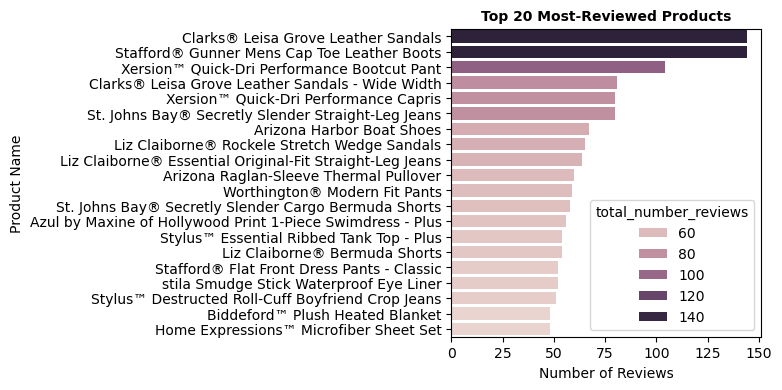

In [54]:
most_reviewed = (
    final_merged.groupby("name")["total_number_reviews"]
    .count()
    .sort_values(ascending=False)     #Dataset to show total number of reviews for each product - top 20 only
    .head(20)
    .reset_index()
)

plt.figure(figsize=(4, 4))
sns.barplot(data=most_reviewed, x="total_number_reviews", y="name", hue = "total_number_reviews")
plt.title("Top 20 Most-Reviewed Products", fontsize=10, weight="bold")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()

In [55]:
final_merged[final_merged["total_number_reviews"] == 1].shape[0]

1963

1963 items only had 1 review, so least reviewed graph - bars just looked identical - not really useful


In [56]:
final_merged[final_merged["av_score"] == 5].shape[0]


474

474 items with an average score of 5, similar to the least reviewed items, graph bars just look identical unless its a huge graph which isn't practical to use.


To prepare for the next plot (Rating vs Review count), I wanted to create a couple of data sets. First dataset would be the average score of each product and the second would be to count how many times each product received a review. Then merge both together to perform the analysis. I want to compare this to the same plot with av_score and total_number_reviews.

In [65]:
top_rated = (
    final_merged.groupby("name", as_index=False)    #Using name of item as first column
    ["score"].mean()                              #Taking the mean of the scores
)

most_reviewed = (
    final_merged.groupby("name", as_index=False) 
    ["review"].count()            #Counting number of reviews
)

true_avg = pd.merge(top_rated, most_reviewed, on="name", how="inner")
true_avg.head(2), compare_df.shape

(                                                name     score  review
 0             1 CT. Certified Diamond Solitaire Ring  2.333333       3
 1  1 CT. T.W. Certified Diamond 14K White Gold Br...  5.000000       1,
 (6001, 3))

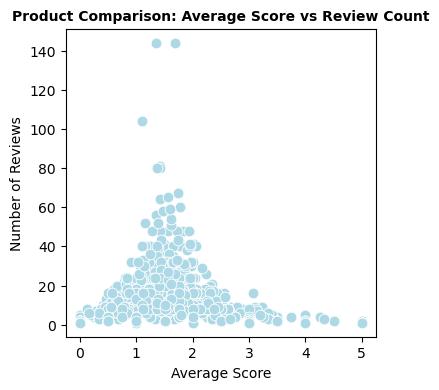

In [66]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=true_avg, x="score", y="review", color="lightblue", s=60)
plt.title("Product Comparison: Average Score vs Review Count", fontsize=10, weight="bold")
plt.xlabel("Average Score")
plt.ylabel("Number of Reviews")
plt.show()

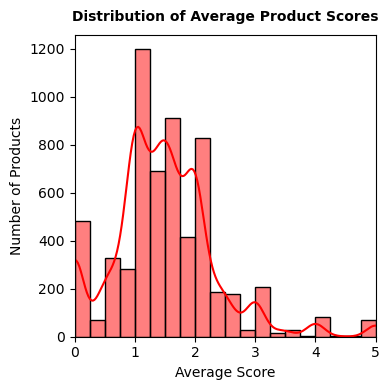

In [68]:
#Plotting the distribution of average product scores to visualize how product ratings are spread across all items
#This shows general happiness of customers among all products
plt.figure(figsize=(4,4))   
sns.histplot(data=true_avg, x="score", bins=20, kde=True, color="red")
plt.title("Distribution of Average Product Scores", fontsize=10, weight="bold", pad=10)
plt.xlabel("Average Score")
plt.ylabel("Number of Products")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()